In [5]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
import osmnx as ox

In [2]:
labels = gpd.read_file('data/seattle_labels.geojson')

In [7]:
#get the bounding box of the labels
print(labels.total_bounds)


[-122.41842651   47.49544907 -122.23896027   47.7345314 ]


<AxesSubplot: >

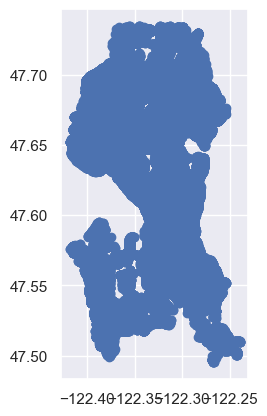

In [8]:
labels.plot()

In [3]:
#north, south, east, west
G = ox.graph_from_bbox(47.7345314, 47.49544907, -122.23896027, -122.41842651, network_type='walk')

In [4]:
nodes, edges = ox.utils_graph.graph_to_gdfs(G)
edges.head()

osmid  oneway   lanes  \
u        v          key                                                    
29449863 3391701883 0                          332060236   False       3   
         9231042186 0                          424636850   False       2   
         29464223   0                          426250827   False       2   
         2247309277 0    [4636259, 361443212, 431103955]   False  [2, 4]   
29462909 3683076717 0                          364254479   False       2   

                            ref                            name    highway  \
u        v          key                                                      
29449863 3391701883 0    WA 513        East Montlake Place East  secondary   
         9231042186 0       NaN  East Lake Washington Boulevard  secondary   
         29464223   0       NaN                             NaN  secondary   
         2247309277 0    WA 513         Montlake Boulevard East    primary   
29462909 3683076717 0       NaN  Lake Washington Boulevard East  secondary   

                        maxspeed      junction   length bridge  \
u        v          key                                          
29449863 3391701883 0     25 mph  intersection   10.658    NaN   
         9231042186 0     25 mph           NaN    5.468    NaN   
         29464223   0        NaN  intersection   22.594    NaN   
         2247309277 0     30 mph           NaN  179.173    yes   
29462909 3683076717 0     25 mph           NaN   17.682    NaN   

                                                                  geometry  \
u        v          key                                                      
29449863 3391701883 0    LINESTRING (-122.30363 47.64413, -122.30368 47...   
         9231042186 0    LINESTRING (-122.30363 47.64413, -122.30356 47...   
         29464223   0    LINESTRING (-122.30363 47.64413, -122.30389 47...   
         2247309277 0    LINESTRING (-122.30363 47.64413, -122.30369 47...   
29462909 3683076717 0    LINESTRING (-122.29793 47.64109, -122.29795 47...   

                        access service width tunnel  
u        v          key                              
29449863 3391701883 0      NaN     NaN   NaN    NaN  
         9231042186 0      NaN     NaN   NaN    NaN  
         29464223   0      NaN     NaN   NaN    NaN  
         2247309277 0      NaN     NaN   NaN    NaN  
29462909 3683076717 0      NaN     NaN   NaN    NaN

In [11]:
#reindex edges
edges = edges.reset_index()

In [19]:
edges

,u,v,key,osmid,oneway,lanes,ref,name,highway,maxspeed,junction,length,bridge,geometry,access,service,width,tunnel
0,29449863,3391701883,0,332060236,False,3,WA 513,East Montlake Place East,secondary,25 mph,intersection,10.658,NaN,"LINESTRING (-122.30363 47.64413, -122.30368 47...",NaN,NaN,NaN,NaN
1,29449863,9231042186,0,424636850,False,2,NaN,East Lake Washington Boulevard,secondary,25 mph,NaN,5.468,NaN,"LINESTRING (-122.30363 47.64413, -122.30356 47...",NaN,NaN,NaN,NaN
2,29449863,29464223,0,426250827,False,2,NaN,NaN,secondary,NaN,intersection,22.594,NaN,"LINESTRING (-122.30363 47.64413, -122.30389 47...",NaN,NaN,NaN,NaN
3,29449863,2247309277,0,"[4636259, 361443212, 431103955]",False,"[2, 4]",WA 513,Montlake Boulevard East,primary,30 mph,NaN,179.173,yes,"LINESTRING (-122.30363 47.64413, -122.30369 47...",NaN,NaN,NaN,NaN
4,29462909,3683076717,0,364254479,False,2,NaN,Lake Washington Boulevard East,secondary,25 mph,NaN,17.682,NaN,"LINESTRING (-122.29793 47.64109, -122.29795 47...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378749,10677708644,8920206638,0,1147534068,False,NaN,NaN,NaN,footway,NaN,NaN,38.389,NaN,"LINESTRING (-122.34188 47.61708, -122.34219 47...",NaN,NaN,NaN,NaN
378750,10677708645,1884382819,0,1144626770,False,1,NaN,NaN,service,15 mph,NaN,6.646,NaN,"LINESTRING (-122.34171 47.61699, -122.34178 47...",NaN,alley,NaN,NaN
378751,10677708645,1884382812,0,1144626770,False,1,NaN,NaN,service,15 mph,NaN,122.407,NaN,"LINESTRING (-122.34171 47.61699, -122.34048 47...",NaN,alley,NaN,NaN
378752,10677708645,10677708619,0,1147534080,False,NaN,NaN,NaN,footway,NaN,NaN,36.376,NaN,"LINESTRING (-122.34171 47.61699, -122.34168 47...",NaN,NaN,NaN,NaN


In [21]:
#explode the osmid column
sidewalks = edges.explode('osmid')

In [32]:
#select only the osmid and geometry columns
sidewalks = sidewalks[['osmid', 'geometry']]

In [33]:
sidewalks

,osmid,geometry
0,332060236,"LINESTRING (-122.30363 47.64413, -122.30368 47..."
1,424636850,"LINESTRING (-122.30363 47.64413, -122.30356 47..."
2,426250827,"LINESTRING (-122.30363 47.64413, -122.30389 47..."
3,4636259,"LINESTRING (-122.30363 47.64413, -122.30369 47..."
3,361443212,"LINESTRING (-122.30363 47.64413, -122.30369 47..."
...,...,...
378749,1147534068,"LINESTRING (-122.34188 47.61708, -122.34219 47..."
378750,1144626770,"LINESTRING (-122.34171 47.61699, -122.34178 47..."
378751,1144626770,"LINESTRING (-122.34171 47.61699, -122.34048 47..."
378752,1147534080,"LINESTRING (-122.34171 47.61699, -122.34168 47..."


In [35]:
#save edges to geojson
sidewalks.to_file('data/seattle_osm_sidewalks.geojson', driver='GeoJSON')

In [6]:
#read in the sidewalks
sidewalks = gpd.read_file('data/seattle_osm_sidewalks.geojson')

In [7]:
sidewalks

,osmid,geometry
0,332060236,"LINESTRING (-122.30363 47.64413, -122.30368 47..."
1,424636850,"LINESTRING (-122.30363 47.64413, -122.30356 47..."
2,426250827,"LINESTRING (-122.30363 47.64413, -122.30389 47..."
3,4636259,"LINESTRING (-122.30363 47.64413, -122.30369 47..."
4,361443212,"LINESTRING (-122.30363 47.64413, -122.30369 47..."
...,...,...
464759,1147534068,"LINESTRING (-122.34188 47.61708, -122.34219 47..."
464760,1144626770,"LINESTRING (-122.34171 47.61699, -122.34178 47..."
464761,1144626770,"LINESTRING (-122.34171 47.61699, -122.34048 47..."
464762,1147534080,"LINESTRING (-122.34171 47.61699, -122.34168 47..."


In [8]:
sidewalks.to_file("seattle_osm_sidewalks.shp")